# Unemployment Before and After Aritificial Intelligence (AI)

In [181]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
## Data Collection (Loading Datasets)
df_india = pd.read_csv("Unemployment in India.csv")

# Load Dataset 1: Unemployment in India
df_upto_2022 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Load Dataset 2: Unemployment Rate up to 2022
df_india.head() , df_upto_2022.head()


(           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                                     43.24  Rural  
 1           11755881.0                                     42.05  Rural  
 2           12086707.0                                     43.50  Rural  
 3           12285693.0                                     43.97  Rural  
 4           12256762.0                                     44.68  Rural  ,
            Region         Date  Frequency   Estimated Unemployment

In [38]:
#understanding the data

# Dataset structure and data types
print("Dataset 1 Info:")
df_india.info()

print("\nDataset 2 Info:")
df_upto_2022.info()

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtyp

In [39]:
# Shape of datasets
print("Dataset 1 Shape:", df_india.shape)
print("Dataset 2 Shape:", df_upto_2022.shape)

Dataset 1 Shape: (768, 7)
Dataset 2 Shape: (267, 9)


In [43]:
df_india.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [44]:
df_upto_2022.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [40]:
# Statistical summary for numerical columns
print("Dataset 1 Summary:")
display(df_india.describe())

print("\nDataset 2 Summary:")
display(df_upto_2022.describe())

Dataset 1 Summary:


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000



Dataset 2 Summary:


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [46]:
#data cleaning

# Remove leading and trailing spaces from column names
df_india.columns = df_india.columns.str.strip()
df_upto_2022.columns = df_upto_2022.columns.str.strip()

# Verify cleaned column names
print(df_india.columns)
print(df_upto_2022.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [47]:
# Remove leading/trailing spaces from Date values
df_india['Date'] = df_india['Date'].str.strip()
df_upto_2022['Date'] = df_upto_2022['Date'].str.strip()

In [48]:
# Convert Date column to datetime format (day first format)
df_india['Date'] = pd.to_datetime(
    df_india['Date'],
    dayfirst=True,
    errors='coerce'   # Converts invalid dates to NaT instead of crashing
)

df_upto_2022['Date'] = pd.to_datetime(
    df_upto_2022['Date'],
    dayfirst=True,
    errors='coerce'
)

# Verify conversion
df_india.info()
df_upto_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                

In [18]:
# Check if any dates failed to convert
print(df_india['Date'].isna().sum())
print(df_upto_2022['Date'].isna().sum())

28
0


In [49]:
# Remove rows where Date is missing (NaT) in Dataset 1
df_india = df_india.dropna(subset=['Date'])

# Reset index after removing rows
df_india.reset_index(drop=True, inplace=True)

# Verify that no invalid dates remain
print(df_india['Date'].isna().sum())

0


In [50]:
# Check final shapes after cleaning
print("Dataset 1 shape:", df_india.shape)
print("Dataset 2 shape:", df_upto_2022.shape)

Dataset 1 shape: (740, 7)
Dataset 2 shape: (267, 9)


In [56]:
df_india.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [57]:
df_upto_2022.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [54]:
# Check duplicate rows in Dataset 1
print("Duplicate rows in Dataset 1:", df_india.duplicated().sum())

# Check duplicate rows in Dataset 2
print("Duplicate rows in Dataset 2:", df_upto_2022.duplicated().sum())

# Remove duplicate rows
df_india.drop_duplicates
df_upto_2022.drop_duplicates

# Reset index
df_india.reset_index(drop=True)


Duplicate rows in Dataset 1: 0
Duplicate rows in Dataset 2: 0


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
736,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
737,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
738,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [55]:
# Reset index
df_upto_2022.reset_index(drop=True)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855


In [62]:
# Ensure df_india is a full independent DataFrame
df_india = df_india.copy()
df_upto_2022 = df_upto_2022.copy()

In [64]:
# Remove leading/trailing spaces
df_india.loc[:, 'Frequency'] = df_india['Frequency'].str.strip()
df_upto_2022.loc[:, 'Frequency'] = df_upto_2022['Frequency'].str.strip()

# Standardize all values to 'Monthly'
df_india.loc[:, 'Frequency'] = 'Monthly'
df_upto_2022.loc[:, 'Frequency'] = 'Monthly'

print("Dataset 1 Frequency values:", df_india['Frequency'].unique())
print("Dataset 2 Frequency values:", df_upto_2022['Frequency'].unique())

Dataset 1 Frequency values: ['Monthly']
Dataset 2 Frequency values: ['Monthly']


In [65]:
# Understand how unemployment behaves across time, regions, and areas

1. #TIME RANGE OF DATA
# Check time range of both datasets
print("Dataset 1 Date Range:")
print(df_india['Date'].min(), "to", df_india['Date'].max())

print("\nDataset 2 Date Range:")
print(df_upto_2022['Date'].min(), "to", df_upto_2022['Date'].max())

Dataset 1 Date Range:
2019-05-31 00:00:00 to 2020-06-30 00:00:00

Dataset 2 Date Range:
2020-01-31 00:00:00 to 2020-10-31 00:00:00


## Note: 
Dataset 1 covers 2019–2020, so before/after comparison
reflects short-term impact around COVID and early automation trends.

In [66]:
2. # NUMBER OF STATES / REGIONS
# Number of unique regions (states)
print("Number of regions in Dataset 1:", df_india['Region'].nunique())
print("Number of regions in Dataset 2:", df_upto_2022['Region'].nunique())

Number of regions in Dataset 1: 28
Number of regions in Dataset 2: 27


In [67]:
3. # RURAL vs URBAN DISTRIBUTION

# Count of Rural vs Urban observations
df_india['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [68]:
4. # AVERAGE UNEMPLOYMENT RATE BY AREA

# Average unemployment rate by area
area_unemployment = df_india.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print(area_unemployment)

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


In [69]:
5. # STATE-WISE AVERAGE UNEMPLOYMENT (TOP & BOTTOM)
# Average unemployment rate by state
state_avg_unemp = (
    df_india.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
)

# Top 5 states
print("Top 5 States by Unemployment Rate:")
print(state_avg_unemp.head())

# Bottom 5 states
print("\nBottom 5 States by Unemployment Rate:")
print(state_avg_unemp.tail())

Top 5 States by Unemployment Rate:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64

Bottom 5 States by Unemployment Rate:
Region
Gujarat        6.663929
Uttarakhand    6.582963
Assam          6.428077
Odisha         5.657857
Meghalaya      4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


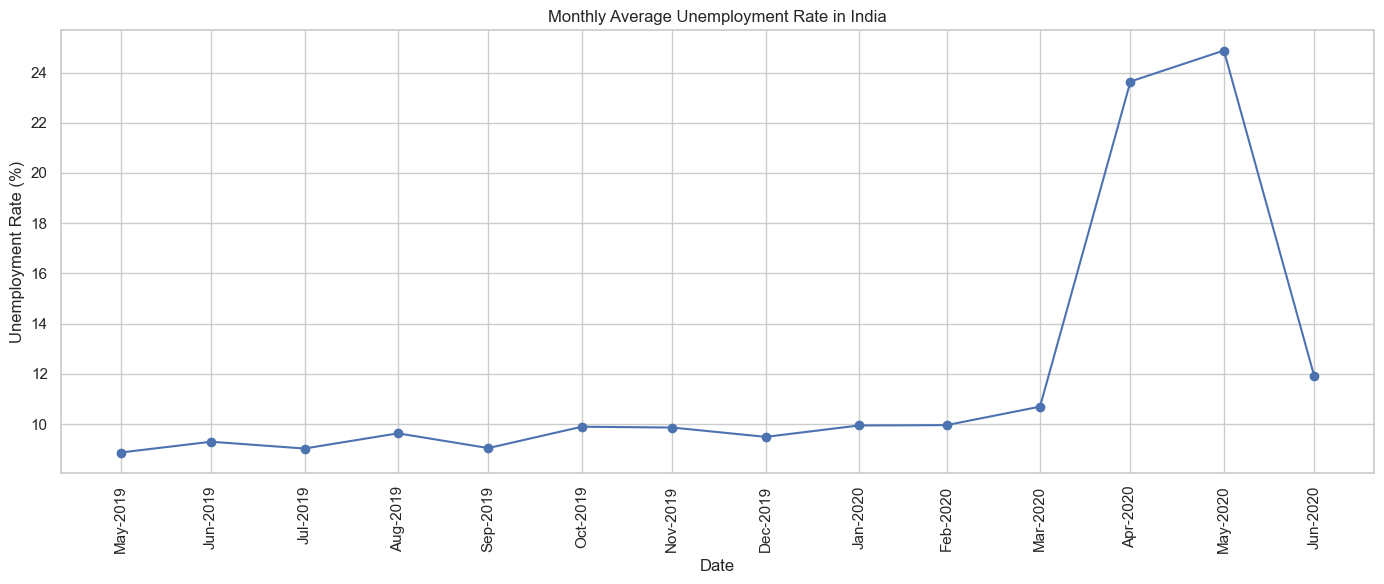

In [78]:
6. # TREND OVER TIME (MONTHLY)
# Monthly unemployment trend


# Group data by Date and calculate average unemployment rate per month
monthly_trend = (
    df_india
    .groupby('Date')['Estimated Unemployment Rate (%)']
    .mean()
)

# Plot monthly unemployment trend with all months
plt.figure(figsize=(14,6))  # Make plot wider
plt.plot(monthly_trend, marker='o', linestyle='-')
plt.title("Monthly Average Unemployment Rate in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

# Show all months with rotation to avoid overlap
plt.xticks(ticks=monthly_trend.index, labels=monthly_trend.index.strftime('%b-%Y'), rotation=90)

plt.tight_layout()
plt.show()

In [74]:
# Ensure Date is datetime
df_india['Date'] = pd.to_datetime(df_india['Date'])

# Create Year column
df_india['Year'] = df_india['Date'].dt.year

In [75]:
7. # Group by Year and calculate mean
yearly_trend = (
    df_india
    .groupby('Year', as_index=False)['Estimated Unemployment Rate (%)']
    .mean()
)

print(yearly_trend.head())

   Year  Estimated Unemployment Rate (%)
0  2019                         9.399047
1  2020                        15.101581


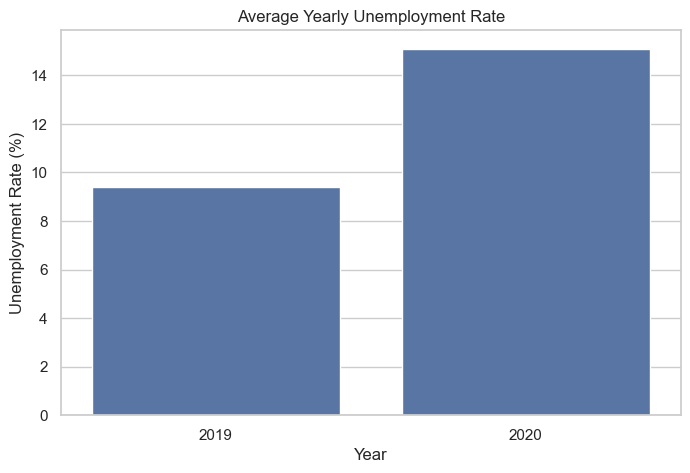

In [81]:
# Plot yearly trend
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Estimated Unemployment Rate (%)', data=yearly_trend)
plt.title("Average Yearly Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()

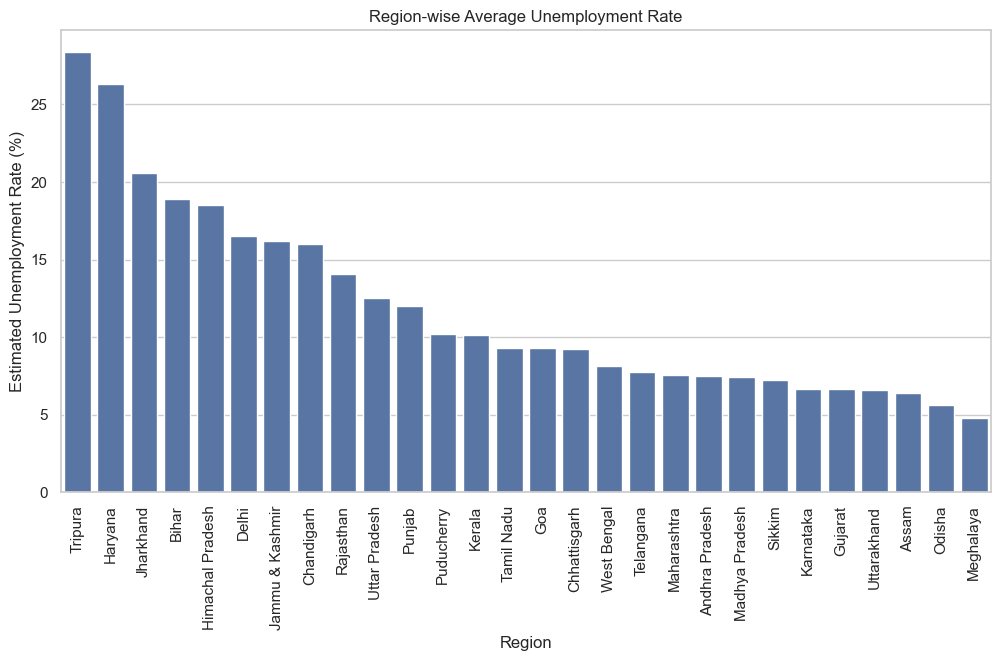

In [83]:
8. #region-wise average unemployment rate

region_trend = df_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=region_trend)
plt.xticks(rotation=90)
plt.title("Region-wise Average Unemployment Rate")
plt.show()

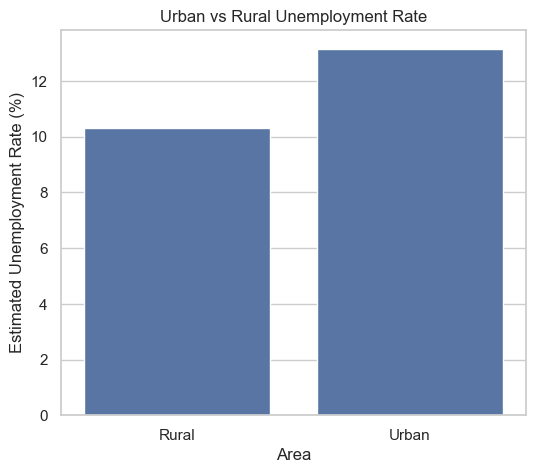

In [85]:
9. # area wise unemployement rate

area_trend = df_india.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)', data=area_trend)
plt.title("Urban vs Rural Unemployment Rate")
plt.show()

Average Unemployment Rate Before and After AI/COVID:
            Period  Estimated Unemployment Rate (%)
0   After AI/COVID                        15.101581
1  Before AI/COVID                         9.399047


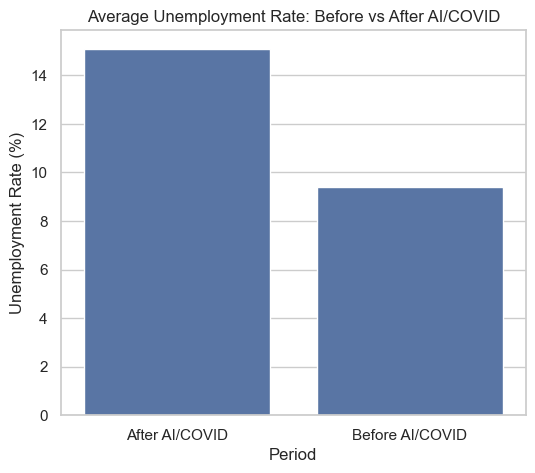

In [157]:
10. # Extract Year from Date
df_india['Year'] = df_india['Date'].dt.year  # Create a 'Year' column


#  Categorize Before vs After AI/COVID
# 2019 = Before AI/COVID, 2020+ = After AI/COVID
df_india['Period'] = df_india['Year'].apply(lambda x: 'Before AI/COVID' if x == 2019 else 'After AI/COVID')

# Verify
df_india[['Date', 'Year', 'Period']].head(10)


# Compute average unemployment rate per period
period_trend = df_india.groupby('Period')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Print to see numbers
print("Average Unemployment Rate Before and After AI/COVID:")
print(period_trend)


#Plot Before vs After
plt.figure(figsize=(6,5))
sns.barplot(x='Period', y='Estimated Unemployment Rate (%)', data=period_trend)
plt.title("Average Unemployment Rate: Before vs After AI/COVID")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [90]:
# Dataset 3: Unemployment Rate Total

# Check first few rows
df_total=pd.read_csv("unemployment_rate_total.csv")
df_total.head()

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,03-01-2016,W,8.97,303166709,35.55
1,10-01-2016,W,10.19,399045948,47.41
2,17-01-2016,W,6.86,411660428,47.14
3,24-01-2016,W,6.06,418592936,47.50
4,31-01-2016,W,11.42,393343265,47.31


In [91]:
#  Check column names & clean
print(df_total.columns)

# Remove any leading/trailing spaces
df_total.columns = df_total.columns.str.strip()
df_total['Date'] = df_total['Date'].str.strip()

# Convert Date to datetime
df_total['Date'] = pd.to_datetime(df_total['Date'], dayfirst=True, errors='coerce')

# Check for invalid dates
print("Missing Dates:", df_total['Date'].isna().sum())

# Drop rows with missing dates
df_total = df_total.dropna(subset=['Date']).reset_index(drop=True)

# Verify
df_total.info()

Index([' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)'],
      dtype='object')
Missing Dates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     299 non-null    datetime64[ns]
 1   Frequency                                299 non-null    object        
 2   Estimated Unemployment Rate (%)          299 non-null    float64       
 3   Estimated Employed                       299 non-null    int64         
 4   Estimated Labour Participation Rate (%)  299 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 11.8+ KB


In [184]:
# Shape of dataset
print("Dataset 3 Shape:", df_total.shape)

Dataset 3 Shape: (299, 7)


In [138]:
df_total.dtypes

Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Year                                                int32
Period                                             object
dtype: object

In [150]:
# CHECK missing values
df_total.isnull().sum()

Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Year                                       0
Period                                     0
dtype: int64

In [149]:
# Check duplicate rows in Dataset 2
df_total.duplicated().sum()

np.int64(0)

In [185]:
# Extract Year
df_total['Year'] = df_total['Date'].dt.year

# Check unique years
print("Years in Dataset 3:", df_total['Year'].unique())

Years in Dataset 3: [2016 2017 2018 2019 2020 2021]


Year-wise Average Unemployment Rate (Total):
   Year  Estimated Unemployment Rate (%)
0  2016                         8.313077
1  2017                         4.391132
2  2018                         6.137115
3  2019                         7.545769
4  2020                        11.075769
5  2021                         8.112105


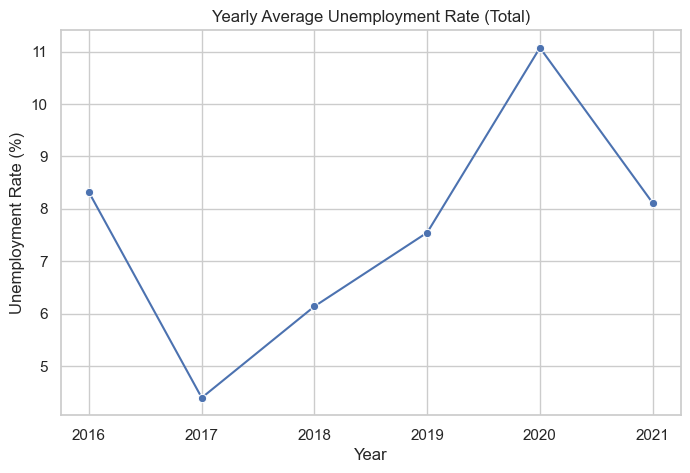

In [94]:
11. # Year-wise Average Unemployment Rate
yearly_total = df_total.groupby('Year')['Estimated Unemployment Rate (%)'].mean().reset_index()

print("Year-wise Average Unemployment Rate (Total):")
print(yearly_total)

# Plot trend
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_total, x='Year', y='Estimated Unemployment Rate (%)', marker='o')
plt.title("Yearly Average Unemployment Rate (Total)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(yearly_total['Year'])
plt.grid(True)
plt.show()

Period
After AI/COVID  (2020–2021)    9.824444
Before AI/COVID (2016–2019)    6.586220
Name: Estimated Unemployment Rate (%), dtype: float64


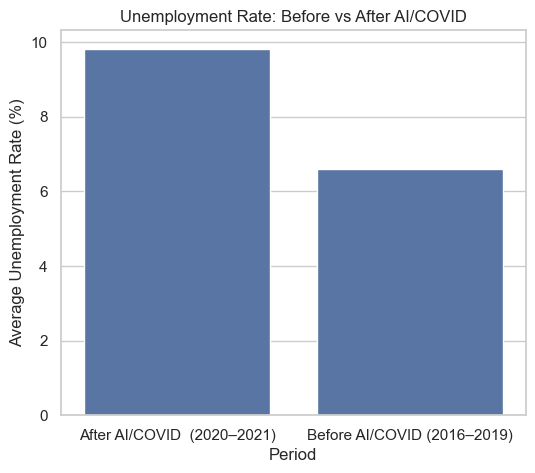

In [182]:
#12. Unemployment rate Before and after ai/covid

# Categorize period
df_total['Period'] = df_total['Year'].apply(
    lambda x: 'Before AI/COVID (2016–2019)' if x < 2020 else 'After AI/COVID  (2020–2021)'
)

# Average unemployment by period
period_comparison = (
    df_total
    .groupby('Period')['Estimated Unemployment Rate (%)']
    .mean()
)

print(period_comparison)

# Plot comparison
plt.figure(figsize=(6,5))
sns.barplot(
    x=period_comparison.index,
    y=period_comparison.values
)
plt.title("Unemployment Rate: Before vs After AI/COVID")
plt.ylabel("Average Unemployment Rate (%)")
plt.xlabel("Period")
plt.show()

Year-wise State vs Total-level Unemployment:
   Year  State-level Avg Unemployment (%)  Total-level Avg Unemployment (%)
0  2016                               NaN                          8.313077
1  2017                               NaN                          4.391132
2  2018                               NaN                          6.137115
3  2019                          9.399047                          7.545769
4  2020                         15.101581                         11.075769
5  2021                               NaN                          8.112105


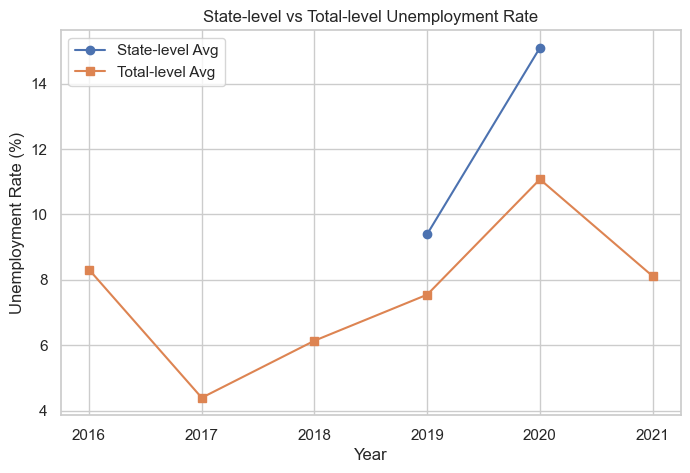

In [183]:
#13. Combine both dataset 1 and dataset 3 and plot state-level and total-level Avg Unemployment rate

# Dataset 1: Yearly Average by India
yearly_state_avg = df_india.groupby('Year')['Estimated Unemployment Rate (%)'].mean().reset_index()
yearly_state_avg.rename(columns={'Estimated Unemployment Rate (%)':'State-level Avg Unemployment (%)'}, inplace=True)


# Dataset 3: Yearly Total Unemployment
yearly_total_avg = df_total.groupby('Year')['Estimated Unemployment Rate (%)'].mean().reset_index()
yearly_total_avg.rename(columns={'Estimated Unemployment Rate (%)':'Total-level Avg Unemployment (%)'}, inplace=True)


# Merge both for comparison
unemp_comparison = pd.merge(yearly_state_avg, yearly_total_avg, on='Year', how='outer')
print("Year-wise State vs Total-level Unemployment:")
print(unemp_comparison)

#plot 
plt.figure(figsize=(8,5))
plt.plot(unemp_comparison['Year'], unemp_comparison['State-level Avg Unemployment (%)'], marker='o', label='State-level Avg')
plt.plot(unemp_comparison['Year'], unemp_comparison['Total-level Avg Unemployment (%)'], marker='s', label='Total-level Avg')
plt.title("State-level vs Total-level Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(unemp_comparison['Year'])
plt.legend()
plt.grid(True)
plt.show()

Average Unemployment Before vs After AI:
      Period    Year  State-level Avg Unemployment (%)  \
0   After AI  2020.5                         15.101581   
1  Before AI  2017.5                          9.399047   

   Total-level Avg Unemployment (%)  
0                          9.593937  
1                          6.596773  


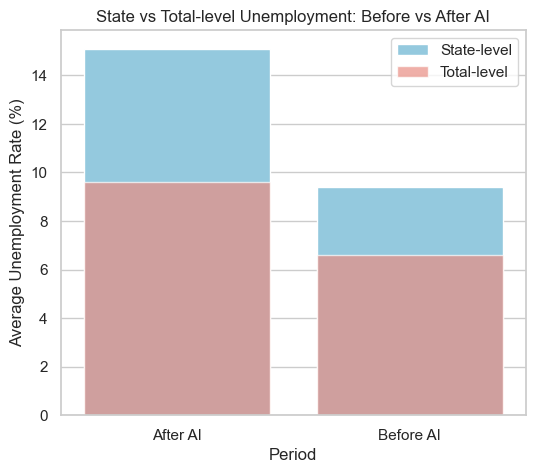

In [186]:
14. # Categorize Before vs After AI combine both dataset 1 and dataset 3

# Using Year: 2019 = Before, 2020+ = After
unemp_comparison['Period'] = unemp_comparison['Year'].apply(
    lambda x: 'Before AI' if x < 2020 else 'After AI'
)


# Compute average unemployment per period for both state and total
period_comparison = unemp_comparison.groupby('Period').mean().reset_index()

print("Average Unemployment Before vs After AI:")
print(period_comparison)


# Plot comparison
plt.figure(figsize=(6,5))
sns.barplot(x='Period', y='State-level Avg Unemployment (%)', data=period_comparison, color='skyblue', label='State-level')
sns.barplot(x='Period', y='Total-level Avg Unemployment (%)', data=period_comparison, color='salmon', alpha=0.7, label='Total-level')
plt.title("State vs Total-level Unemployment: Before vs After AI")
plt.ylabel("Average Unemployment Rate (%)")
plt.legend()
plt.show()

In [136]:
# Dataset 4: AI Job Trends Analysis

#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 4
df_ai = pd.read_csv("ai_job_trends_dataset.csv")

# Clean column names
df_ai.columns = df_ai.columns.str.strip()

# Check for missing values
print("Missing values per column:")
print(df_ai.isnull().sum())

# Drop rows where 'AI Impact Level' or 'Job Openings (2024)' is missing
df_ai = df_ai.dropna(subset=['AI Impact Level', 'Job Openings (2024)'])



Missing values per column:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [146]:
#duplicates values
df_ai.duplicated().sum()

np.int64(0)

In [162]:
print(df_ai.columns)

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')


In [163]:
# Shape of dataset
print("Dataset 4 Shape:", df_ai.shape)

Dataset 3 Shape: (30000, 13)


In [164]:
 df_total.dtypes

Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Year                                                int32
Period                                             object
dtype: object

In [165]:
df_ai.isnull().sum()

Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64

In [166]:
df_ai.duplicated().sum()

np.int64(0)

In [167]:
# Group job openings by AI Impact Level
ai_impact_summary = (
    df_ai.groupby('AI Impact Level')['Job Openings (2024)']
    .sum()
    .reset_index()
    .sort_values(by='Job Openings (2024)', ascending=False)
)

# Display result
ai_impact_summary

,AI Impact Level,Job Openings (2024)
2,Moderate,50793565
0,High,50225587
1,Low,50170073


In [158]:
15. # List High AI Impact Jobs
high_ai_jobs = df_ai[df_ai['AI Impact Level'].isin(['High', 'Very High'])]
print("Sample High AI Impact Jobs:")
display(high_ai_jobs[['Job Title', 'Industry', 'AI Impact Level', 'Job Openings (2024)']])


16. # Check projected openings in 2030
projected_summary = (
    df_ai.groupby('AI Impact Level')['Projected Openings (2030)']
    .sum()
    .reset_index()
    .sort_values(by='Projected Openings (2030)', ascending=False)
)

print("Projected AI Job Openings by 2030:")
print(projected_summary)

Sample High AI Impact Jobs:


,Job Title,Industry,AI Impact Level,Job Openings (2024)
3,Legal secretary,Healthcare,High,7173
6,"Surveyor, insurance",Manufacturing,High,9738
7,Dentist,Entertainment,High,1393
8,Emergency planning/management officer,Education,High,7729
11,Housing manager/officer,Entertainment,High,2800
...,...,...,...,...
29969,"Buyer, retail",Entertainment,High,1512
29976,Herpetologist,Education,High,3268
29982,Records manager,Manufacturing,High,7472
29984,Energy engineer,IT,High,552


Projected AI Job Openings by 2030:
  AI Impact Level  Projected Openings (2030)
2        Moderate                   51107628
0            High                   50906899
1             Low                   50212016


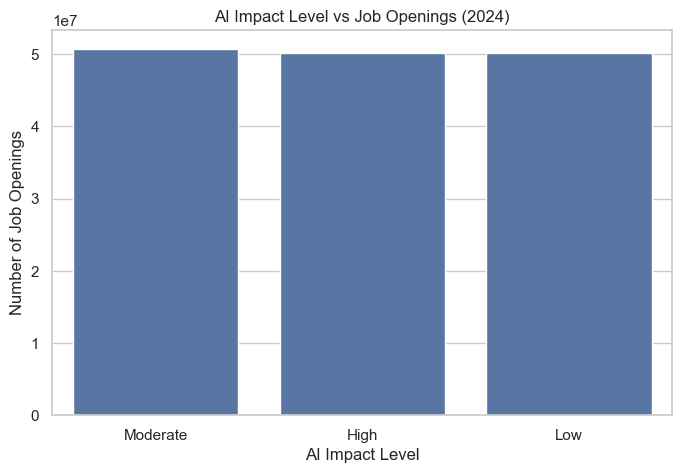

In [107]:
17. # plot AI Impact Level vs Job Openings
plt.figure(figsize=(8,5))
sns.barplot(x='AI Impact Level', y='Job Openings (2024)', data=ai_impact_summary)
plt.title("AI Impact Level vs Job Openings (2024)")
plt.xlabel("AI Impact Level")
plt.ylabel("Number of Job Openings")
plt.show()

In [169]:
df_ai.shape
df_ai.duplicated().sum()

np.int64(0)

In [171]:
df_ai_clean = df_ai.drop_duplicates(
    subset=['Job Title','Industry','AI Impact Level']
)

df_ai_clean.shape

(13148, 13)

In [172]:
df_ai_clean['Job Openings (2024)'].sum()

np.int64(66504878)

Total AI Job Openings (2024): 66504878
Final Summary Table:


,Period,State-level Avg Unemployment (%),Total-level Avg Unemployment (%),AI Job Openings (2024)
0,Before AI,9.399047,6.586220,0
1,After AI,15.101581,9.824444,66504878


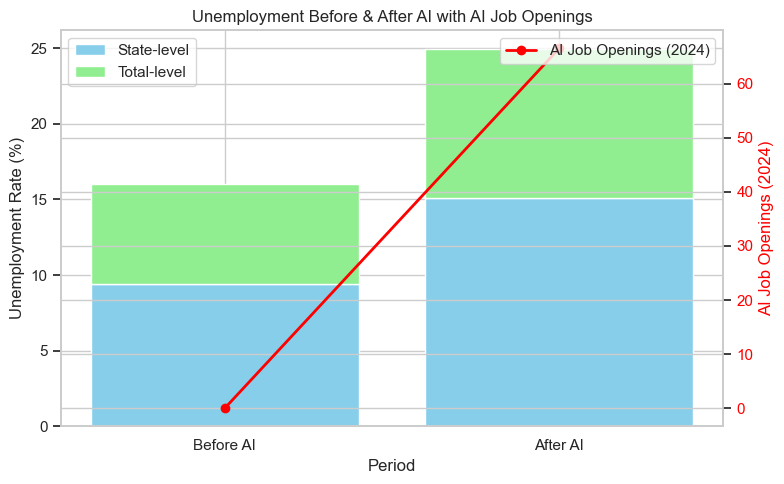


Key Insights:
1. State-level unemployment increased from 9.4% (Before AI) to 15.1% (After AI/COVID).
2. Total-level unemployment increased from 6.6% to 9.8% in the same period.
3. AI job openings in 2024 total approximately 66,504,878, indicating large-scale AI-driven job creation.
4. This shows a transition phase where unemployment rises while new AI-related jobs emerge.
5. Future unemployment outcomes depend strongly on reskilling and AI adaptation.


In [189]:
#20. Final Summary Table Unemployment Before & After AI with AI Job Openings

# Compute AI Job Openings dynamically
ai_jobs_2024 = df_ai_clean['Job Openings (2024)'].sum()
print("Total AI Job Openings (2024):", ai_jobs_2024)

#  Final Summary Table (MODIFIED)
final_summary = pd.DataFrame({
    'Period': ['Before AI', 'After AI'],
    'State-level Avg Unemployment (%)': [9.399047, 15.101581],
    'Total-level Avg Unemployment (%)': [6.586220, 9.824444],
    'AI Job Openings (2024)': [0, ai_jobs_2024]   # ✅ dynamic value
})

print("Final Summary Table:")
display(final_summary)

# Visualize Summary
fig, ax1 = plt.subplots(figsize=(8,5))

# Stacked bar: unemployment
ax1.bar(final_summary['Period'],
        final_summary['State-level Avg Unemployment (%)'],
        label='State-level',
        color='skyblue')

ax1.bar(final_summary['Period'],
        final_summary['Total-level Avg Unemployment (%)'],
        bottom=final_summary['State-level Avg Unemployment (%)'],
        label='Total-level',
        color='lightgreen')

ax1.set_ylabel("Unemployment Rate (%)")
ax1.set_xlabel("Period")
ax1.set_title("Unemployment Before & After AI with AI Job Openings")
ax1.legend(loc='upper left')

# Line plot for AI Job Openings (secondary axis)
ax2 = ax1.twinx() 

ax2.plot(comparison_df['Period'],
         comparison_df['AI Jobs'] / 1_000_000,   # in millions
         color='red',
         marker='o',
         linewidth=2,
         label='AI Job Openings (2024)')

ax2.set_ylabel("AI Job Openings (2024)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


#  Key Insights 

insights = [
    "1. State-level unemployment increased from 9.4% (Before AI) to 15.1% (After AI/COVID).",
    "2. Total-level unemployment increased from 6.6% to 9.8% in the same period.",
    f"3. AI job openings in 2024 total approximately {ai_jobs_2024:,}, indicating large-scale AI-driven job creation.",
    "4. This shows a transition phase where unemployment rises while new AI-related jobs emerge.",
    "5. Future unemployment outcomes depend strongly on reskilling and AI adaptation."
]

print("\nKey Insights:")
for insight in insights:
    print(insight)

## Post-2022: Impact of AI on Unemployment (Future Scope)

After 2022, strong Artificial Intelligence (AI) adoption accelerated across
industries such as IT, Finance, Manufacturing, and Media.
However, official unemployment datasets are available only up to 2021–2022.

Therefore, instead of calculating unemployment rates after 2022,
this study uses AI Job Trend indicators to understand how AI may
influence employment and unemployment patterns in the future.

Key observations:
- Jobs with high automation risk may lead to short-term unemployment
  in routine and repetitive roles.
- AI simultaneously creates new job opportunities in AI-enabled,
  data-driven, and technology-oriented roles.
- This indicates a **shift in job structure**, not complete job loss.

Hence, post-2022 unemployment trends depend heavily on
reskilling, upskilling, and AI adaptation rather than AI alone.

### Interpretation (Post-2022)

- High and Moderate AI Impact jobs still show large job openings in 2024.
- This indicates that AI is not eliminating jobs entirely.
- Instead, AI is transforming job roles and skill requirements.

Conclusion:
Post-2022 unemployment cannot be measured numerically due to lack of
official data. However, AI job trends suggest that unemployment outcomes
will depend on workforce reskilling and AI readiness.

## LIMITATION & FUTURE SCOPE (2022–2026)

The unemployment datasets used in this study are available only until 2021.
Large-scale AI adoption accelerated after 2022 with the rise of generative AI tools.

Hence, for the period 2023–2026, direct unemployment rates are not available.
Instead, AI job trend data is analyzed to understand employment shifts.

The increase in AI-related job openings in 2024 indicates that while automation
may displace some roles, AI is simultaneously generating new employment
opportunities, suggesting a structural transformation rather than job loss.

## Final Conclusion

This project analyzed unemployment trends before and after AI adoption
using official unemployment datasets up to 2021.
A significant increase in unemployment was observed during the
post-AI and COVID period (2020–2021).

For post-2022, AI job trend datasets were used to understand
future employment direction.
The study concludes that AI causes job transformation rather than
complete job loss, making skill development crucial for reducing
future unemployment.